# Tutorial del ecosistema de módulos

Flujo: **DATOS → RESUMEN ESTADÍSTICO → INCERTIDUMBRES → AJUSTE → PREDICCIÓN + INCERTIDUMBRE → HERRAMIENTAS NUMÉRICAS → GRÁFICAS → ANIMACIÓN → EXPORT LaTeX**

In [1]:
# Imports y setup
import sys
from pathlib import Path
import numpy as np
import sympy as sp

ROOT = Path.cwd()
if str(ROOT.parent) not in sys.path:
    sys.path.insert(0, str(ROOT.parent))

try:
    from estadistica import estadistica
    from incertidumbres import incertidumbres
    from ajustes import ajustes
    from numericos import numericos
    from graficos import graficos
    from animaciones import animaciones
    from latex_tools import latex_tools
except Exception:
    from Python_toolbox.estadistica import estadistica
    from Python_toolbox.incertidumbres import incertidumbres
    from Python_toolbox.ajustes import ajustes
    from Python_toolbox.numericos import numericos
    from Python_toolbox.graficos import graficos
    from Python_toolbox.animaciones import animaciones
    from Python_toolbox.latex_tools import latex_tools

**Qué hace:** configura rutas e importa los submódulos principales del toolbox.

**Resultado esperado:** sin salida; si hay errores de importación, no continúa el tutorial.

## SECCIÓN 0 — Setup y datos

In [2]:
rng = np.random.default_rng(42)

x = np.linspace(0, 10, 40)
a_true, b_true = 1.5, 2.0
sigma_ruido = 0.8

y_true = a_true + b_true * x
ruido = rng.normal(0.0, sigma_ruido, size=x.size)
y = y_true + ruido

sy = 0.8 + 0.05 * (1 + x / x.max())

for i in range(3):
    print(f"x={x[i]:.3f}, y={y[i]:.3f}, sy={sy[i]:.3f}")

x=0.000, y=1.744, sy=0.850
x=0.256, y=1.181, sy=0.851
x=0.513, y=3.126, sy=0.853


**Qué hace:** genera datos sintéticos lineales con ruido y muestra 3 muestras con su incertidumbre.

**Resultados esperados (con semilla 42):**
- `x=0.000, y=1.744, sy=0.850`
- `x=0.256, y=1.181, sy=0.851`
- `x=0.513, y=3.126, sy=0.853`

## SECCIÓN 0B — Tratamiento de datos con errores (n datos, n incertidumbres)

media ponderada = 7.2235
varianza ponderada = 9.9127
a = 2.1944 +/- 0.1649
b = 0.8461 +/- 0.0237
chi2_red = 1.012
p = 0.447


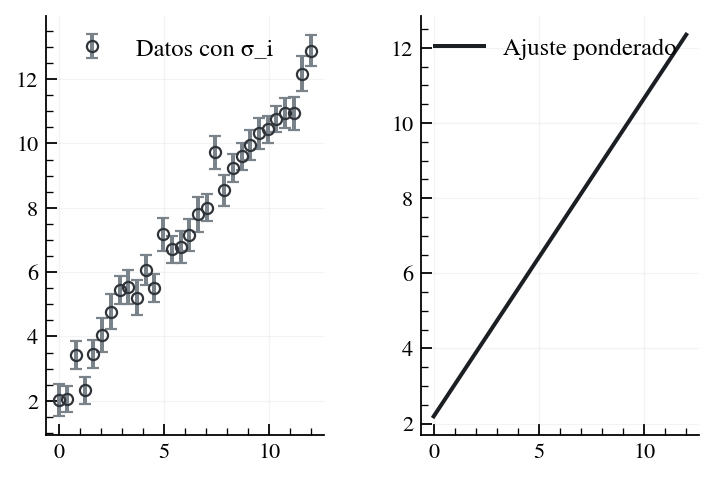

(<Figure size 768x512 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

In [3]:
# Datos con incertidumbres individuales (n datos, n errores)
rng_trat = np.random.default_rng(123)
n = 30
x_trat = np.linspace(0, 12, n)
a0, b0 = 2.2, 0.85

sy_trat = 0.4 + 0.15 * rng_trat.random(n)
y_trat_true = a0 + b0 * x_trat
y_trat = y_trat_true + rng_trat.normal(0.0, sy_trat)

# Estadística con pesos (1/sigma^2)
media_p = estadistica.media_ponderada(y_trat, sigma=sy_trat)
var_p = estadistica.varianza_ponderada(y_trat, sigma=sy_trat, tipo="frecuentista")
print(f"media ponderada = {media_p:.4f}")
print(f"varianza ponderada = {var_p:.4f}")

# Ajuste lineal ponderado
res_trat = ajustes.ajuste_lineal(x_trat, y_trat, sy=sy_trat)
print("a =", round(res_trat["parametros"]["a"], 4), "+/-", round(res_trat["errores"]["sa"], 4))
print("b =", round(res_trat["parametros"]["b"], 4), "+/-", round(res_trat["errores"]["sb"], 4))
print("chi2_red =", round(res_trat["chi2_red"], 3))
print("p =", round(res_trat["p"], 3))

# Visualización rápida del ajuste
serie_trat = graficos.SerieConError(x_trat, y_trat, sy=sy_trat, label="Datos con σ_i")
ajuste_trat = graficos.Ajuste(x_trat, res_trat["yfit"], label="Ajuste ponderado")
graficos.plot(serie_trat, ajuste_trat, title="Tratamiento de datos con errores")

## SECCIÓN 0C — Mapa de calor 2D (plot independiente)

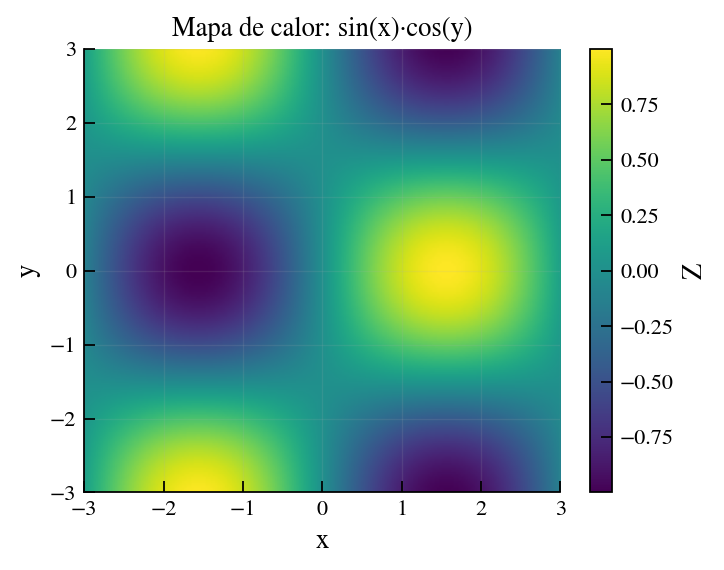

In [4]:
import matplotlib.pyplot as plt

grid = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(grid, grid)
Z = np.sin(X) * np.cos(Y)

plt.figure(figsize=(4.8, 3.6))
plt.imshow(
    Z,
    extent=[grid.min(), grid.max(), grid.min(), grid.max()],
    origin="lower",
    cmap="viridis",
    aspect="auto",
 )
plt.colorbar(label="Z")
plt.title("Mapa de calor: sin(x)·cos(y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## SECCIÓN 0D — Animación independiente (mapa de calor)

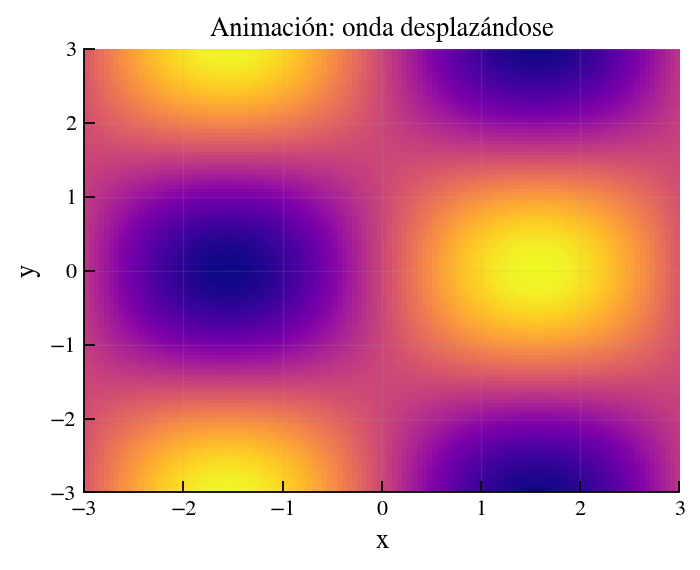

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

grid_anim = np.linspace(-3, 3, 120)
X_anim, Y_anim = np.meshgrid(grid_anim, grid_anim)

fig_anim, ax_anim = plt.subplots(figsize=(4.8, 3.6))
Z0 = np.sin(X_anim) * np.cos(Y_anim)
im = ax_anim.imshow(
    Z0,
    extent=[grid_anim.min(), grid_anim.max(), grid_anim.min(), grid_anim.max()],
    origin="lower",
    cmap="plasma",
    animated=True,
    aspect="auto",
    vmin=-1,
    vmax=1,
 )
ax_anim.set_title("Animación: onda desplazándose")
ax_anim.set_xlabel("x")
ax_anim.set_ylabel("y")

def _update(frame):
    phase = 0.15 * frame
    Z = np.sin(X_anim + phase) * np.cos(Y_anim - phase)
    im.set_data(Z)
    return [im]

anim = animation.FuncAnimation(
    fig_anim,
    _update,
    frames=60,
    interval=60,
    blit=True,
 )

plt.show()

**Guardar animación:** exporta un GIF para descargarlo o abrirlo fuera del notebook.

In [6]:
from pathlib import Path

salida_dir = Path.cwd() / "salidas"
salida_dir.mkdir(exist_ok=True)
gif_path = salida_dir / "animacion_mapa_calor.gif"

# Requiere Pillow (si falta, instala: pip install pillow)
anim.save(str(gif_path), writer=animation.PillowWriter(fps=15))
print(f"Animación guardada en {gif_path}")

Animación guardada en c:\Users\marti\Documents\GitHub\python_toolbox\Python_toolbox\salidas\animacion_mapa_calor.gif


## SECCIÓN 1 — Estadística básica (estadistica.py)

In [7]:
media = estadistica.media(y)
var = estadistica.varianza(y)
std = estadistica.desviacion_tipica(y)
sem = estadistica.error_estandar(y)

print(f"media = {media:.4f}")
print(f"varianza = {var:.4f}")
print(f"desviación típica = {std:.4f}")
print(f"error estándar = {sem:.4f}")

ic = estadistica.intervalo_confianza(y, nivel=0.95, distribucion="normal")
print(
    "IC 95% (normal): "
    f"[{ic['limite_inferior']:.4f}, {ic['limite_superior']:.4f}]"
)

media = 11.5306
varianza = 37.2722
desviación típica = 6.1051
error estándar = 0.9653
IC 95% (normal): [9.5781, 13.4831]


**Qué hace:** calcula estadísticos básicos y un IC del 95%.

**Resultados esperados (aprox.):**
- `media = 11.5306`
- `varianza = 37.2722`
- `desviación típica = 6.1051`
- `error estándar = 0.9653`
- `IC 95% (normal): [9.5781, 13.4831]`

## SECCIÓN 1B — Test de hipótesis (estadistica.py)

In [8]:
# Test de hipótesis para la media (t-test, σ desconocida)
mu0 = 9.0
res_ht = estadistica.test_media(y, mu0=mu0, distribucion="normal", alternativa="dos_colas")

print("H0: mu =", mu0)
print("estadístico:", round(res_ht["estadistico"], 4))
print("p-valor:", round(res_ht["p_valor"], 4))
print("método:", res_ht["metodo"], "| n =", res_ht["n"], "| df =", res_ht.get("grados_libertad"))

alpha = 0.05
decision = "rechazar H0" if res_ht["p_valor"] < alpha else "no rechazar H0"
print("decisión (alpha=0.05):", decision)

H0: mu = 9.0
estadístico: 2.6216
p-valor: 0.0124
método: t | n = 40 | df = 39
decisión (alpha=0.05): rechazar H0


## SECCIÓN 2 — Incertidumbres (uncertainties + sympy)

In [9]:
u_escalar = incertidumbres.u(10.0, 0.2)
print(f"u(10.0, 0.2) -> {u_escalar}")

u_vec = incertidumbres.u(y[:5], 0.3)
print(f"u(array, sigma_escalar) -> {u_vec}")

u_vec2 = incertidumbres.u(y[:5], sy[:5])
print(f"u(array, sigma_array) -> {u_vec2}")

xs, ys = sp.symbols("x y")
f = sp.sin(xs) / ys
vals = {xs: 1.2, ys: 0.8}
sigs = {xs: 0.05, ys: 0.02}
prop = incertidumbres.propagacion_incertidumbre_sympy(f, [xs, ys], vals, sigs)

print(f"f = {prop['f']['latex']}")
print(f"valor = {prop['valor']['value']:.4f}")
print(f"incertidumbre = {prop['incertidumbre']['value']:.4f}")
print(f"sigma_f (LaTeX) = {prop['sigma_f']['latex']}")

u(10.0, 0.2) -> 10.00+/-0.20
u(array, sigma_escalar) -> [1.743773663803545+/-0.3 1.1808332278281162+/-0.3 3.1260019822861915+/-0.3
 3.7909133115745095+/-0.3 1.9904539003589818+/-0.3]
u(array, sigma_array) -> [1.743773663803545+/-0.8500000000000001
 1.1808332278281162+/-0.8512820512820514
 3.1260019822861915+/-0.8525641025641026
 3.7909133115745095+/-0.8538461538461539
 1.9904539003589818+/-0.8551282051282052]
f = \frac{\sin{\left(x \right)}}{y}
valor = 1.1650
incertidumbre = 0.0369
sigma_f (LaTeX) = \sqrt{\frac{\sigma_{x}^{2} y^{2} \cos^{2}{\left(x \right)} + \sigma_{y}^{2} \sin^{2}{\left(x \right)}}{y^{4}}}


**Qué hace:** crea cantidades con incertidumbre y propaga errores con SymPy.

**Resultados esperados (aprox.):**
- `u(10.0, 0.2) -> 10.00+/-0.20`
- `u(array, sigma_escalar) -> [...] +/-0.3` (5 valores)
- `u(array, sigma_array) -> [...]` (sigmas crecientes)
- `f = sin(x)/y`
- `valor = 1.1650`
- `incertidumbre = 0.0369`
- `sigma_f (LaTeX) = sqrt((sigma_x^2 y^2 cos^2(x) + sigma_y^2 sin^2(x))/y^4)`

## SECCIÓN 3 — Ajuste de datos (ajustes.py)

In [10]:
res = ajustes.ajuste_lineal(x, y, sy=sy)
a_hat = res['parametros']['a']
b_hat = res['parametros']['b']
sa = res['errores']['sa']
sb = res['errores']['sb']

print(f"a = {a_hat:.4f} ± {sa:.4f}")
print(f"b = {b_hat:.4f} ± {sb:.4f}")
print(f"chi2_red = {res['chi2_red']:.3f}")
print(f"p = {res['p']:.3f}")

res_poly = ajustes.ajuste_polinomico(x, y, grado=2, sy=sy)
print("coeficientes (grado 2) =", np.round(res_poly['coeficientes'], 4))

def modelo(xv, a, b):
    return a + b * xv

res_unif = ajustes.ajuste(modelo, x, y, sy=sy, p0=[1.0, 1.0])
print("ajuste() params =", np.round(res_unif['parametros'], 4))

ic_params = ajustes.intervalo_confianza_parametros(res_unif, nivel=0.95)
print("IC parámetros (95%):")
for p in ic_params['parametros']:
    print(f"  {p['nombre']}: [{p['inferior']:.4f}, {p['superior']:.4f}]")

x0 = 7.5
pred = ajustes.incertidumbre_prediccion(res, modelo, x0)
print(f"y({pred['x']:.2f}) = {pred['y']:.4f} ± {pred['sigma_modelo']:.4f}")

a = 1.4019 ± 0.2675
b = 2.0258 ± 0.0467
chi2_red = 0.580
p = 0.982
coeficientes (grado 2) = [-0.0108  2.1327  1.2311]
ajuste() params = [1.4019 2.0258]
IC parámetros (95%):
  p0: [0.8776, 1.9262]
  p1: [1.9342, 2.1173]
y(7.50) = 16.5950 ± 0.1841


**Qué hace:** ajusta un modelo lineal, calcula un polinomio de grado 2, e intervalos de confianza.

**Resultados esperados (aprox.):**
- `a = 1.4019 ± 0.2675`
- `b = 2.0258 ± 0.0467`
- `chi2_red = 0.580`
- `p = 0.982`
- `coeficientes (grado 2) = [-0.0108  2.1327  1.2311]`
- `ajuste() params = [1.4019 2.0258]`
- `IC parámetros (95%): p0 [0.8776, 1.9262], p1 [1.9342, 2.1173]`
- `y(7.50) = 16.5950 ± 0.1841`

## SECCIÓN 4 — Herramientas numéricas (numericos.py)

In [11]:
x_sym = sp.symbols("x")
expr = sp.sin(x_sym) + x_sym**2

d_expr = numericos.derivar(expr, x_sym)
print(f"derivada simbólica: d/dx = {d_expr}")

integ = numericos.integrar_definida(sp.exp(-x_sym), x_sym, 0, 2)
print(f"integral definida exp(-x) [0,2] = {float(integ):.4f}")

root = numericos.raiz_numerica(lambda t: np.cos(t), 1.5)
print(f"raíz numérica cos(x)=0 cerca de 1.5 -> {root:.6f}")

val = numericos.evaluar(expr, {x_sym: 1.2})
print(f"evaluar sin(x)+x^2 en x=1.2 -> {val:.4f}")

def f_edo(t, yv):
    return -0.8 * yv

rk = numericos.rk4(f_edo, (0, 5), y0=1.0, dt=0.1)
print(f"rk4: y(t=5) ≈ {rk['y'][-1]:.4f}")

derivada simbólica: d/dx = 2*x + cos(x)
integral definida exp(-x) [0,2] = 0.8647
raíz numérica cos(x)=0 cerca de 1.5 -> 1.570796
evaluar sin(x)+x^2 en x=1.2 -> 2.3720
rk4: y(t=5) ≈ 0.0183


**Qué hace:** deriva, integra, halla una raíz, evalúa y resuelve una EDO con RK4.

**Resultados esperados (aprox.):**
- `derivada simbólica: d/dx = 2*x + cos(x)`
- `integral definida exp(-x) [0,2] = 0.8647`
- `raíz numérica cos(x)=0 cerca de 1.5 -> 1.570796`
- `evaluar sin(x)+x^2 en x=1.2 -> 2.3720`
- `rk4: y(t=5) ≈ 0.0183`

## SECCIÓN 5 — Visualización estática (graficos.py)

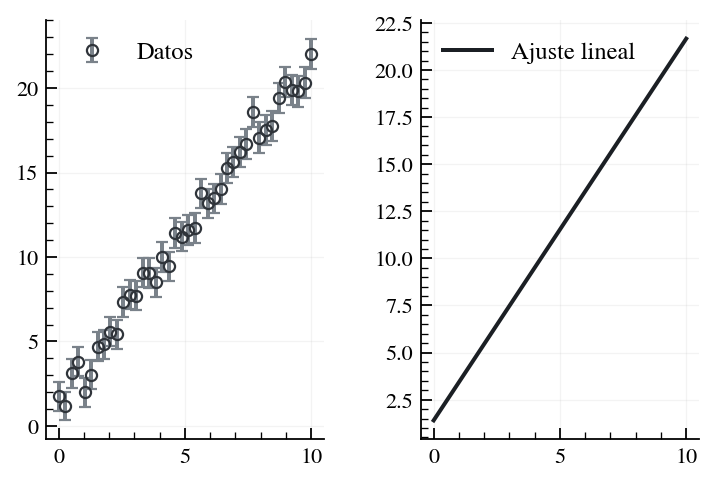

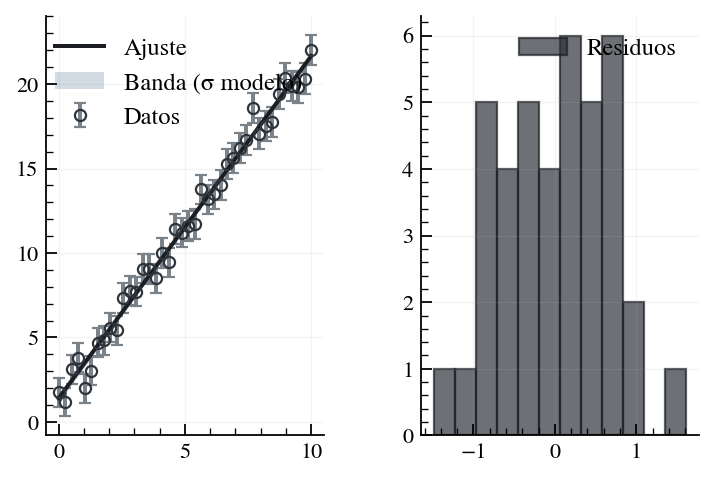

Figura guardada en ./salidas/figura_demo.pdf


In [12]:
ajuste_lineal = graficos.Ajuste(x, res['yfit'], label="Ajuste lineal")
serie = graficos.SerieConError(x, y, sy=sy, label="Datos")
fig_directo, _ = graficos.plot(serie, ajuste_lineal, title="Modo directo")

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = modelo(x_fit, a_hat, b_hat)
pred_band = ajustes.incertidumbre_prediccion(res, modelo, x_fit)
sigma_modelo = pred_band['sigma_modelo']

banda = graficos.Banda(
    x_fit,
    y_fit - sigma_modelo,
    y_fit + sigma_modelo,
    label="Banda (σ modelo)"
)

panel1 = graficos.Panel(
    graficos.SerieConError(x, y, sy=sy, label="Datos"),
    graficos.Ajuste(x_fit, y_fit, label="Ajuste"),
    banda,
)

residuos = y - res['yfit']
panel2 = graficos.Panel(
    graficos.Histograma(residuos, bins=12, label="Residuos")
)

scene = graficos.Scene(
    panel1,
    panel2,
    layout="1x2",
    xlabel="x",
    ylabel="y",
    title="Scene + Panel"
)

fig_scene, _ = graficos.plot(scene)

salida_dir = Path.cwd() / "salidas"
salida_dir.mkdir(exist_ok=True)
graficos.guardar(fig_scene, str(salida_dir / "figura_demo"))
print("Figura guardada en ./salidas/figura_demo.pdf")

**Qué hace:** genera figuras con ajuste, banda de incertidumbre y un histograma de residuos.

**Resultados esperados:**
- Se muestran dos paneles (datos+ajuste+banda y residuos).
- Se guarda un archivo en `./salidas/figura_demo.pdf` y aparece el mensaje: `Figura guardada en ./salidas/figura_demo.pdf`.

## SECCIÓN 6 — Animación declarativa (animaciones.py)

In [13]:
# Recargar módulos para evitar usar versiones antiguas
import importlib
import sys

for mod_name in ("graficos", "animaciones", "Python_toolbox.graficos", "Python_toolbox.animaciones"):
    if mod_name in sys.modules:
        importlib.reload(sys.modules[mod_name])

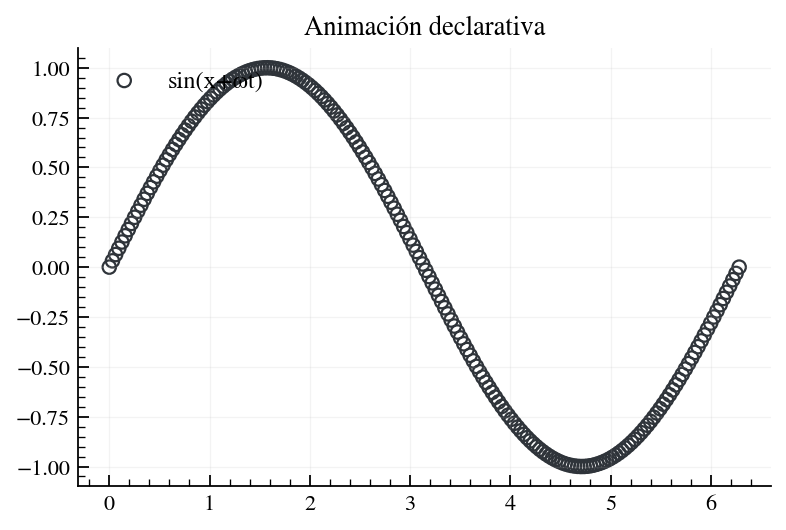

In [14]:
import numpy as np

x_anim = np.linspace(0, 2 * np.pi, 200)
serie_anim = graficos.Serie(x_anim, np.sin(x_anim), label="sin(x+ωt)")
scene_anim = graficos.Scene(serie_anim, title="Animación declarativa")

omega = 1.5
evolve = {
    serie_anim: lambda t: np.sin(x_anim + omega * t)
}

animaciones.animate(
    scene_anim,
    evolve,
    duration=3.0,
    fps=30,
    speed=1.0,
    loop=True,
    show=True,
 )

**Qué hace:** crea una animación declarativa de una onda seno evolucionando en el tiempo.

**Resultado esperado:** se abre la ventana/visor con la animación; no hay salida de texto si todo va bien.

## SECCIÓN 7 — Export LaTeX (latex_tools.py)

In [15]:
latex_val = latex_tools.valor_pm(9.81, 0.05, unidad="m/s^2", cifras=2)
print("valor_pm escalar ->", latex_val)

tabla = latex_tools.valor_pm(
    y[:4],
    sy[:4],
    cifras=2,
    caption="Muestras iniciales",
    label="tab:datos"
)

expr_latex = latex_tools.expr_to_latex(f)

contenido = "\n".join([
    "% Auto-generado por tutorial_modulo.ipynb",
    "\\section*{Resultados}",
    "Ecuación:",
    f"\\[ f(x,y) = {expr_latex} \\]",
    "Valor con incertidumbre:",
    latex_val,
    "Tabla:",
    tabla,
])

salida_dir = Path.cwd() / "salidas"
salida_dir.mkdir(exist_ok=True)
tex_path = salida_dir / "resultados.tex"
latex_tools.exportar(str(tex_path), contenido)
print(f"Archivo LaTeX exportado a {tex_path}")

valor_pm escalar -> \[(9.810 \pm 0.050)\,\mathrm{m/s^2}\]
Archivo LaTeX exportado a c:\Users\marti\Documents\GitHub\python_toolbox\Python_toolbox\salidas\resultados.tex


**Qué hace:** genera LaTeX para valores con incertidumbre y exporta un .tex.

**Resultado esperado:** se crea `./salidas/resultados.tex` y se imprime la ruta del archivo exportado.